# Módulo # 4 - Big Data

## Final Project
## Autor: Jose Martinez

# Input Data

## Probability of winning an Oscar in a movie based on the IMDb and Rotten Tomatoes ratings

### Features Oscar Data Set

- `year_film`: year of the film (integer)
- `year_ceremony`: year of the ceremony (integer)
- `ceremony_name`: name of the ceremony (string)
- `category`: category of the ceremony (string)
- `name`: name of the film (string)
- `film`: name of the film (string)
- `winner`: winner of the ceremony (string)

### Features IMDB Data Set

- `imdb_title_id`: IMDB title id (string)
- `title`: title of the movie (string)
- `original_title`: original title of the movie (string)
- `year`: year of the movie (integer)
- `date_published`: date of publication of the movie (string)
- `genre`: genre of the movie (string)
- `duration`: duration of the movie (integer)
- `country`: country of origin of the movie (string)
- `language`: language of the movie (string)
- `director`: director of the movie (string)
- `writer`: writer of the movie (string)
- `production_company`: production company of the movie (string)
- `actors`: actors of the movie (string)
- `avg_vote`: average vote of the movie (float)
- `votes`: number of votes of the movie (integer)
- `budget`: budget of the movie (float)
- `usa_gross_income`: gross income of the movie in USA (float)
- `worlwide_gross_income`: gross income of the movie in the world (float)
- `metascore`: metascore of the movie (integer)
- `reviews_from_users`: number of reviews from users of the movie (float)
- `reviews_from_critics`: number of reviews from critics of the movie (float)

### Features Rotten Tomatoes Data Set

- `rotten_tomatoes_link`: link to the Rotten Tomatoes page of the movie (string)
- `movie_title`: title of the movie (string)
- `movie_info`: information about the movie (string)
- `critics_consensus`: critics consensus about the movie (string)
- `content_rating`: content rating of the movie (string)
- `genres`: list of genres of the movie (string)
- `directors`: list of directors of the movie (string)
- `authors`: list of authors of the movie (string)
- `actors_rt`: list of actors of the movie (string)
- `original_release_date`: original release date of the movie (string)
- `streaming_release_date`: streaming release date of the movie (string)
- `runtime`: runtime of the movie (integer)
- `production_company_rt`: production company of the movie (string)
- `tomatometer_status`: status of the movie on the tomatometer (string)
- `tomatometer_rating`: rating of the movie on the tomatometer (integer)
- `tomatometer_count`: number of votes of the movie on the tomatometer (integer)
- `audience_status`: status of the movie on the audience (string)
- `audience_rating`: rating of the movie on the audience (integer)
- `audience_count`: number of votes of the movie on the audience (integer)
- `tomatometer_top_critics_count`: number of top critics of the movie on the tomatometer (integer)
- `tomatometer_fresh_critics_count`: number of fresh critics of the movie on the tomatometer (integer)
- `tomatometer_rotten_critics_count`: number of rotten critics of the movie on the tomatometer (integer

### Target Variable

- `winner`: winner of the ceremony (string)

In [1]:
import findspark
findspark.init('/usr/lib/python3.7/site-packages/pyspark')
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Bigdata: Model") \
    .config("spark.driver.extraClassPath", "postgresql-42.2.14.jar") \
    .config("spark.executor.extraClassPath", "postgresql-42.2.14.jar") \
    .getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/11/15 04:28:42 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# Read data from DB

In [2]:
from pyspark.ml.feature import VectorAssembler


columns_features = [
    "duration", "director_indexed", "writer_indexed", 
    "production_company_indexed", "actors_indexed", "genre_indexed", 
    "avg_vote", "votes", "reviews_from_users", "reviews_from_critics", 
    "tomatometer_rating", "tomatometer_count", "audience_rating", 
    "audience_count", "tomatometer_top_critics_count", 
    "tomatometer_fresh_critics_count", "tomatometer_rotten_critics_count"
]

# Reading single DataFrame in Spark by retrieving all rows from a DB table.
df = spark \
    .read \
    .format("jdbc") \
    .option("url", "jdbc:postgresql://172.17.0.1:5433/postgres") \
    .option("user", "postgres") \
    .option("password", "testPassword") \
    .option("dbtable", "df_clean") \
    .load()

df.show()

assembler = VectorAssembler(
    inputCols=columns_features,
    outputCol='Features')

df = assembler.transform(df)
df = df.select(['Features', 'winner_indexed'])
df.show()

+--------------+------------------+------------------+------------------+--------------------------+------------------+------------------+------------------+--------------------+-------------------+--------------------+------------------+------------------+------------------+--------------------+-----------------------------+-------------------------------+--------------------------------+
|winner_indexed|          duration|  director_indexed|    writer_indexed|production_company_indexed|    actors_indexed|     genre_indexed|          avg_vote|               votes| reviews_from_users|reviews_from_critics|tomatometer_rating| tomatometer_count|   audience_rating|      audience_count|tomatometer_top_critics_count|tomatometer_fresh_critics_count|tomatometer_rotten_critics_count|
+--------------+------------------+------------------+------------------+--------------------------+------------------+------------------+------------------+--------------------+-------------------+----------------

21/11/15 04:29:00 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------------------+--------------+
|            Features|winner_indexed|
+--------------------+--------------+
|[3.33543495392951...|           0.0|
|[4.71311460881344...|           0.0|
|[4.71311460881344...|           0.0|
|[4.71311460881344...|           0.0|
|[4.71311460881344...|           0.0|
|[4.71311460881344...|           0.0|
|[4.71311460881344...|           0.0|
|[3.29918022616941...|           0.0|
|[3.66172750377044...|           0.0|
|[3.66172750377044...|           0.0|
|[5.18442606969479...|           0.0|
|[5.18442606969479...|           0.0|
|[5.18442606969479...|           0.0|
|[5.18442606969479...|           0.0|
|[5.18442606969479...|           0.0|
|[5.18442606969479...|           0.0|
|[4.13303896465179...|           0.0|
|[5.98203008041706...|           0.0|
|[3.48045386496993...|           0.0|
|[3.48045386496993...|           0.0|
+--------------------+--------------+
only showing top 20 rows



# Training the Model

## Split data into training and testing sets

In [3]:
# Split the data into training and test sets (70 % training, 30 % test)
training_df, test_df = df.randomSplit([0.7, 0.3])

# Print the number of observations in the training (label) and test (label) datasets
print(df.count())
print(training_df.count())
print(test_df.count())

1497
1036
461


## Use the K-fold cross validation

In [4]:
# Codigo tomado de https://stackoverflow.com/questions/53600615/cross-validation-metrics-with-pyspark
from pyspark.ml.tuning import CrossValidator, CrossValidatorModel
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.sql.functions import rand
import numpy as np
import collections

TestResult = collections.namedtuple("TestResult", ["params", "metrics"])

class CrossValidatorVerbose(CrossValidator):

    def _fit(self, dataset):
        folds = []
        est = self.getOrDefault(self.estimator)
        epm = self.getOrDefault(self.estimatorParamMaps)
        numModels = len(epm)

        eva = self.getOrDefault(self.evaluator)
        metricName = eva.getMetricName()
        nFolds = self.getOrDefault(self.numFolds)
        seed = self.getOrDefault(self.seed)
        h = 1.0 / nFolds

        randCol = self.uid + "_rand"
        df = dataset.select("*", rand(seed).alias(randCol))
        metrics = [0.0] * numModels

        for i in range(nFolds):
            folds.append([])
            foldNum = i + 1
            print("Comparing models on fold %d" % foldNum)

            validateLB = i * h
            validateUB = (i + 1) * h
            condition = (df[randCol] >= validateLB) & (df[randCol] < validateUB)
            validation = df.filter(condition)
            train = df.filter(~condition)

            for j in range(numModels):
                paramMap = epm[j]
                model = est.fit(train, paramMap)
                # TODO: duplicate evaluator to take extra params from input
                prediction = model.transform(validation, paramMap)
                metric = eva.evaluate(prediction)
                metrics[j] += metric

                avgSoFar = metrics[j] / foldNum
                print("params: %s\t%s: %f\tavg: %f" % (
                    {param.name: val for (param, val) in paramMap.items()},
                    metricName, metric, avgSoFar))
                
                predictionLabels = prediction.select("prediction", "winner_indexed")
                allMetrics = BinaryClassificationMetrics(predictionLabels.rdd)
                folds[i].append(TestResult(paramMap.items(), allMetrics))
                

        if eva.isLargerBetter():
            bestIndex = np.argmax(metrics)
        else:
            bestIndex = np.argmin(metrics)

        bestParams = epm[bestIndex]
        bestModel = est.fit(dataset, bestParams)
        avgMetrics = [m / nFolds for m in metrics]
        bestAvg = avgMetrics[bestIndex]
        print("Best model:\nparams: %s\t%s: %f" % (
            {param.name: val for (param, val) in bestParams.items()},
            metricName, bestAvg))

        return self._copyValues(CrossValidatorModel(bestModel, avgMetrics)), folds

## Modelo 1: Regresión Logística 

In [5]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.tuning import ParamGridBuilder

df = training_df.select('Features', 'winner_indexed')
df.show()

lr = LogisticRegression(featuresCol='Features', labelCol='winner_indexed', maxIter=10)
grid = ParamGridBuilder().addGrid(param=lr.maxIter, values=[10]).build()

# Implementa k-Folds e imprime informacion por cada iteracion
cv = CrossValidatorVerbose(estimator=lr,
                           estimatorParamMaps=grid,
                           evaluator=BinaryClassificationEvaluator(labelCol='winner_indexed'),
                           numFolds=5)

cvlr_model, lr_folds = cv.fit(df)

+--------------------+--------------+
|            Features|winner_indexed|
+--------------------+--------------+
|[2.32030257664662...|           1.0|
|[2.32030257664662...|           1.0|
|[2.53783094320724...|           0.0|
|[2.53783094320724...|           0.0|
|[2.93663294856837...|           0.0|
|[2.93663294856837...|           0.0|
|[2.93663294856837...|           0.0|
|[2.93663294856837...|           1.0|
|[2.93663294856837...|           1.0|
|[2.93663294856837...|           1.0|
|[2.93663294856837...|           1.0|
|[3.00914240408858...|           0.0|
|[3.00914240408858...|           0.0|
|[3.04539713184868...|           0.0|
|[3.04539713184868...|           0.0|
|[3.11790658736889...|           1.0|
|[3.15416131512899...|           0.0|
|[3.15416131512899...|           0.0|
|[3.15416131512899...|           0.0|
|[3.19041604288910...|           0.0|
+--------------------+--------------+
only showing top 20 rows

Comparing models on fold 1


21/11/15 04:29:10 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
21/11/15 04:29:10 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


params: {'maxIter': 10}	areaUnderROC: 0.632892	avg: 0.632892


/usr/lib/python3.7/site-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


Comparing models on fold 2
params: {'maxIter': 10}	areaUnderROC: 0.619614	avg: 0.626253
Comparing models on fold 3
params: {'maxIter': 10}	areaUnderROC: 0.683265	avg: 0.645257
Comparing models on fold 4
params: {'maxIter': 10}	areaUnderROC: 0.629458	avg: 0.641307
Comparing models on fold 5
params: {'maxIter': 10}	areaUnderROC: 0.665884	avg: 0.646223
Best model:
params: {'maxIter': 10}	areaUnderROC: 0.646223


## Modelo 2: Random Forest

In [6]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.tuning import ParamGridBuilder

df = training_df.select('Features', 'winner_indexed')
df.show()

rf = RandomForestClassifier(featuresCol='Features', labelCol='winner_indexed', maxDepth=4)
grid = ParamGridBuilder().addGrid(rf.maxDepth, values=[4]).build()

# Implementa k-Folds e imprime informacion por cada iteracion
cv = CrossValidatorVerbose(estimator=rf,
                           estimatorParamMaps=grid,
                           evaluator=BinaryClassificationEvaluator(labelCol='winner_indexed'),
                           numFolds=5)

cvrf_model, rf_folds = cv.fit(df)

+--------------------+--------------+
|            Features|winner_indexed|
+--------------------+--------------+
|[2.32030257664662...|           1.0|
|[2.32030257664662...|           1.0|
|[2.53783094320724...|           0.0|
|[2.53783094320724...|           0.0|
|[2.93663294856837...|           0.0|
|[2.93663294856837...|           0.0|
|[2.93663294856837...|           0.0|
|[2.93663294856837...|           1.0|
|[2.93663294856837...|           1.0|
|[2.93663294856837...|           1.0|
|[2.93663294856837...|           1.0|
|[3.00914240408858...|           0.0|
|[3.00914240408858...|           0.0|
|[3.04539713184868...|           0.0|
|[3.04539713184868...|           0.0|
|[3.11790658736889...|           1.0|
|[3.15416131512899...|           0.0|
|[3.15416131512899...|           0.0|
|[3.15416131512899...|           0.0|
|[3.19041604288910...|           0.0|
+--------------------+--------------+
only showing top 20 rows

Comparing models on fold 1
params: {'maxDepth': 4}	areaUnderRO

## Model 3: Decision Tree

In [7]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.tuning import ParamGridBuilder

df = training_df.select('Features', 'winner_indexed')
df.show()

dt = DecisionTreeClassifier(featuresCol='Features', labelCol='winner_indexed', maxDepth = 4)
grid = ParamGridBuilder().addGrid(dt.maxDepth, values=[4]).build()

# Implementa k-Folds e imprime informacion por cada iteracion
cv = CrossValidatorVerbose(estimator=dt,
                           estimatorParamMaps=grid,
                           evaluator=BinaryClassificationEvaluator(labelCol='winner_indexed'),
                           numFolds=5)

cvdt_model, dt_folds = cv.fit(df)

+--------------------+--------------+
|            Features|winner_indexed|
+--------------------+--------------+
|[2.32030257664662...|           1.0|
|[2.32030257664662...|           1.0|
|[2.53783094320724...|           0.0|
|[2.53783094320724...|           0.0|
|[2.93663294856837...|           0.0|
|[2.93663294856837...|           0.0|
|[2.93663294856837...|           0.0|
|[2.93663294856837...|           1.0|
|[2.93663294856837...|           1.0|
|[2.93663294856837...|           1.0|
|[2.93663294856837...|           1.0|
|[3.00914240408858...|           0.0|
|[3.00914240408858...|           0.0|
|[3.04539713184868...|           0.0|
|[3.04539713184868...|           0.0|
|[3.11790658736889...|           1.0|
|[3.15416131512899...|           0.0|
|[3.15416131512899...|           0.0|
|[3.15416131512899...|           0.0|
|[3.19041604288910...|           0.0|
+--------------------+--------------+
only showing top 20 rows

Comparing models on fold 1
params: {'maxDepth': 4}	areaUnderRO

# Evaluación del conjunto de validación

In [8]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.sql.functions import explode, array, lit, col
from pyspark.ml.functions import vector_to_array
import matplotlib.pyplot as plt
import numpy as np

def display_metrics(model):
    # Make predictions on the test set
    predictions = model.transform(test_df.select('Features', 'winner_indexed'))

    # Evaluate the model
    evaluator = BinaryClassificationEvaluator(labelCol='winner_indexed')
    auroc = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})
    auprc = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderPR"})
    print("Area under ROC Curve: {:.5f}".format(auroc))
    print("Area under PR Curve: {:.5f}".format(auprc))
    
    evaluator = MulticlassClassificationEvaluator(labelCol='winner_indexed', metricName="accuracy")
    acc = evaluator.evaluate(predictions)
    print("Accuracy: {:.5f}".format(acc))

    return auroc, auprc, acc
    
def save_model(model_name, model):
    
    predictions = model.transform(test_df.select('Features', 'winner_indexed'))
    
    pre_df = (predictions.withColumn("Features", vector_to_array("Features"))).select(["prediction"] + ["winner_indexed"] + [col("Features")[i].alias(columns_features[i]) for i in range(len(columns_features))])    
    pre_df.printSchema()
    
    pre_df \
        .write \
        .format("jdbc") \
        .mode('overwrite') \
        .option("url", "jdbc:postgresql://172.17.0.1:5433/postgres") \
        .option("user", "postgres") \
        .option("password", "testPassword") \
        .option("dbtable", model_name) \
        .save()

## Evaluación y almacenado de modelo 1

Pesos: [0.06214869265023425,-0.0004601059180904877,-0.09828136896828879,-0.12036879182640567,-0.3626936530942706,0.21711341341365897,0.04045015923114121,0.024612145790133263,-0.12870898367756106,0.15686666069038127,-0.28567996255785655,0.10788505259452226,0.3014173054856715,0.16314719855712104,-0.23761966103758356,0.1561137667934647,-0.13700723203122003]
 b: -1.1537841124121377


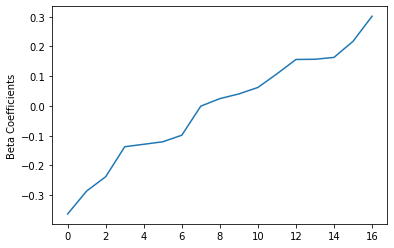

/usr/lib/python3.7/site-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


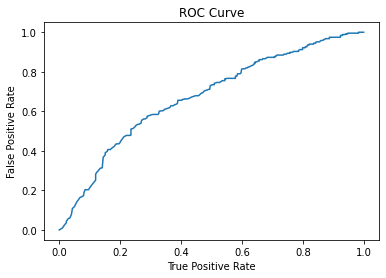

/usr/lib/python3.7/site-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


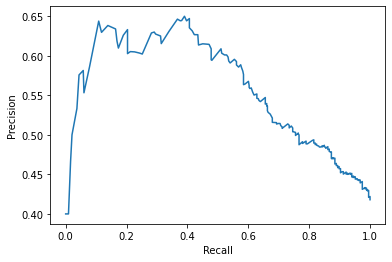

Area under ROC Curve: 0.67774
Area under PR Curve: 0.53351
Accuracy: 0.65727
root
 |-- prediction: double (nullable = false)
 |-- winner_indexed: double (nullable = true)
 |-- duration: double (nullable = true)
 |-- director_indexed: double (nullable = true)
 |-- writer_indexed: double (nullable = true)
 |-- production_company_indexed: double (nullable = true)
 |-- actors_indexed: double (nullable = true)
 |-- genre_indexed: double (nullable = true)
 |-- avg_vote: double (nullable = true)
 |-- votes: double (nullable = true)
 |-- reviews_from_users: double (nullable = true)
 |-- reviews_from_critics: double (nullable = true)
 |-- tomatometer_rating: double (nullable = true)
 |-- tomatometer_count: double (nullable = true)
 |-- audience_rating: double (nullable = true)
 |-- audience_count: double (nullable = true)
 |-- tomatometer_top_critics_count: double (nullable = true)
 |-- tomatometer_fresh_critics_count: double (nullable = true)
 |-- tomatometer_rotten_critics_count: double (null

In [9]:
# Crea graficas y analisis de los resultados

# Weights
print('Pesos: {}\n b: {}'.format(cvlr_model.bestModel.coefficients, cvlr_model.bestModel.intercept))

# Coefficients 
beta = np.sort(cvlr_model.bestModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

# Area under ROC
trainingSummary = cvlr_model.bestModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Precision and recall.
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()
    
cvlr_auroc, cvlr_auprc, cvlr_acc = display_metrics(cvlr_model)

# Guardar modelo en base de datos
save_model("modelo1", cvlr_model)

## Evaluación y almacenado de modelo 2

/usr/lib/python3.7/site-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


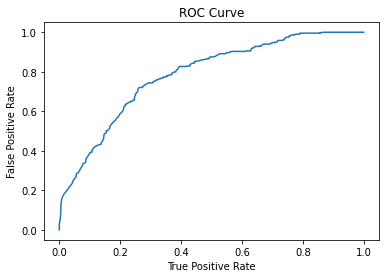

/usr/lib/python3.7/site-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


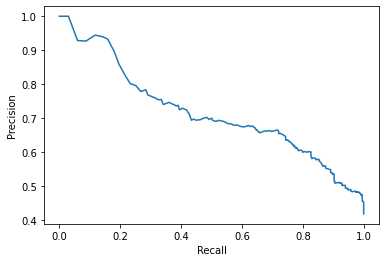

Area under ROC Curve: 0.75433
Area under PR Curve: 0.65656
Accuracy: 0.70716
root
 |-- prediction: double (nullable = false)
 |-- winner_indexed: double (nullable = true)
 |-- duration: double (nullable = true)
 |-- director_indexed: double (nullable = true)
 |-- writer_indexed: double (nullable = true)
 |-- production_company_indexed: double (nullable = true)
 |-- actors_indexed: double (nullable = true)
 |-- genre_indexed: double (nullable = true)
 |-- avg_vote: double (nullable = true)
 |-- votes: double (nullable = true)
 |-- reviews_from_users: double (nullable = true)
 |-- reviews_from_critics: double (nullable = true)
 |-- tomatometer_rating: double (nullable = true)
 |-- tomatometer_count: double (nullable = true)
 |-- audience_rating: double (nullable = true)
 |-- audience_count: double (nullable = true)
 |-- tomatometer_top_critics_count: double (nullable = true)
 |-- tomatometer_fresh_critics_count: double (nullable = true)
 |-- tomatometer_rotten_critics_count: double (null

In [10]:
# Area under ROC
trainingSummary = cvrf_model.bestModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Precision and recall.
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

# Crea graficas y analisis de los resultados
cvrf_auroc, cvrf_auprc, cvrf_acc = display_metrics(cvrf_model)

# Guardar modelo en base de datos
save_model("modelo2", cvrf_model)

## Evaluación y almacenado de modelo 3

In [11]:
# Crea graficas y analisis de los resultados
cvdt_auroc, cvdt_auprc, cvdt_acc = display_metrics(cvdt_model)

# Guardar modelo en base de datos
save_model("modelo3", cvdt_model)

Area under ROC Curve: 0.68487
Area under PR Curve: 0.57042
Accuracy: 0.68113
root
 |-- prediction: double (nullable = false)
 |-- winner_indexed: double (nullable = true)
 |-- duration: double (nullable = true)
 |-- director_indexed: double (nullable = true)
 |-- writer_indexed: double (nullable = true)
 |-- production_company_indexed: double (nullable = true)
 |-- actors_indexed: double (nullable = true)
 |-- genre_indexed: double (nullable = true)
 |-- avg_vote: double (nullable = true)
 |-- votes: double (nullable = true)
 |-- reviews_from_users: double (nullable = true)
 |-- reviews_from_critics: double (nullable = true)
 |-- tomatometer_rating: double (nullable = true)
 |-- tomatometer_count: double (nullable = true)
 |-- audience_rating: double (nullable = true)
 |-- audience_count: double (nullable = true)
 |-- tomatometer_top_critics_count: double (nullable = true)
 |-- tomatometer_fresh_critics_count: double (nullable = true)
 |-- tomatometer_rotten_critics_count: double (null

## Analisis de resultados

Text(0, 0.5, 'Area under ROC Curve')

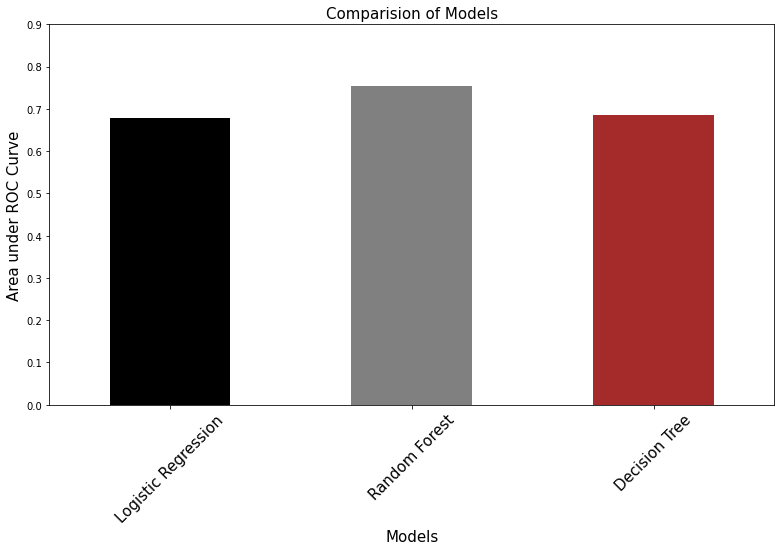

In [12]:
import pandas as pd 

names = ['Logistic Regression','Random Forest','Decision Tree']

results = pd.Series([cvlr_auroc , cvrf_auroc, cvdt_auroc])
ax = results.plot(kind = 'bar',figsize=(13,7),color=['black','gray','brown'])
ax.set_title('Comparision of Models',fontsize=15)
ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
ax.set_xticklabels(names ,fontsize=15,rotation = 45)
ax.set_xlabel("Models",fontsize=15)
ax.set_ylabel("Area under ROC Curve",fontsize=15)

Text(0, 0.5, 'Area under PR Curve')

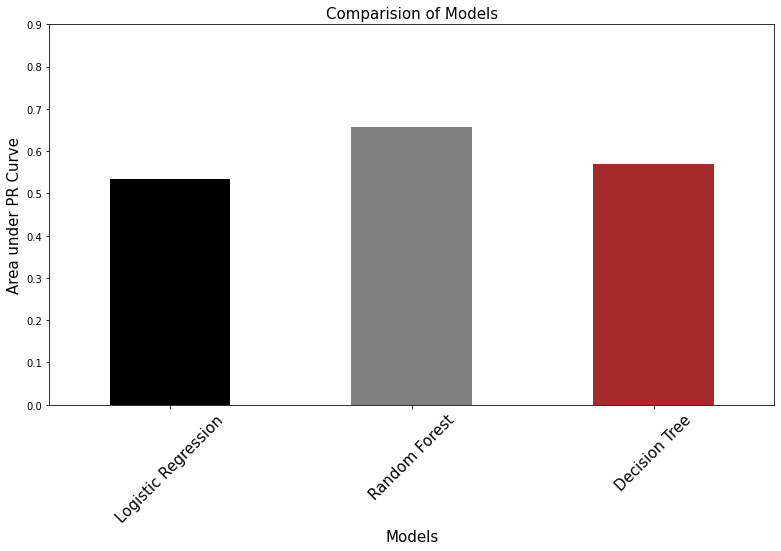

In [13]:
import pandas as pd 

names = ['Logistic Regression','Random Forest','Decision Tree']

results = pd.Series([cvlr_auprc , cvrf_auprc, cvdt_auprc])
ax = results.plot(kind = 'bar',figsize=(13,7),color=['black','gray','brown'])
ax.set_title('Comparision of Models',fontsize=15)
ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
ax.set_xticklabels(names ,fontsize=15,rotation = 45)
ax.set_xlabel("Models",fontsize=15)
ax.set_ylabel("Area under PR Curve",fontsize=15)

Text(0, 0.5, 'Accuracy')

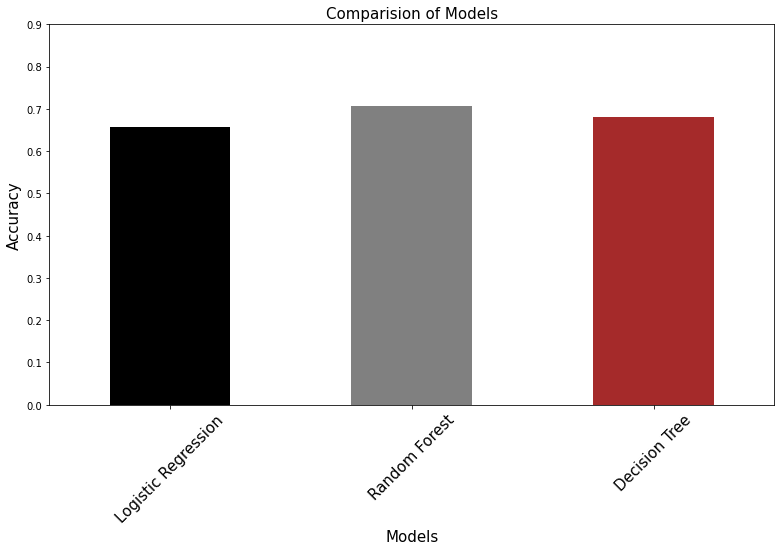

In [14]:
import pandas as pd 

names = ['Logistic Regression','Random Forest','Decision Tree']

results = pd.Series([cvlr_acc , cvrf_acc, cvdt_acc])
ax = results.plot(kind = 'bar',figsize=(13,7),color=['black','gray','brown'])
ax.set_title('Comparision of Models',fontsize=15)
ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
ax.set_xticklabels(names ,fontsize=15,rotation = 45)
ax.set_xlabel("Models",fontsize=15)
ax.set_ylabel("Accuracy",fontsize=15)

# Analisis de resultados

Al realizar la comparacion de los modelos, se puede observar que el modelo 2 es el mejor, el modelo 1 es el segundo mejor y el modelo 3 es el tercero mejor. Para este caso el modelo de Random Forest dio los mejores resultados. En todos los casos se realizo un modelo de k-fold cross validation, para obtener una mejor precisión. En la iteracion de los folds, se esta imprimiendo el AUROC y es interesante observar cambia el valor de AUROC en cada iteración. 

Para todos los casos se obtuvieron acurraciesde entre 0.6 a 0.7, por lo que los resultados no son muy buenos. Al igaul que el AUC de los modelos, el AUC de los modelos de Random Forest es de 0.7, el AUC de los modelos de Decision Tree es de 0.7 y el AUC de los modelos de Regresión Logística es de 0.7.

Una de las razones por las que el modelo no dio tan es porque a la hora de hacer los 'joins' se perdio mucha informacion de la tabla IMDB y Rotten Tomatoes, por lo que el dataset final no contenia suficiente informacion. Esto se dio debido a que la comparacion en el nombre de la pelicula no tomaba en cuenta diferencia de sintaxis, como lo son espacios, comas, etc. Una forma de solucionarlo es hacer uso de Jaccard Distance para comparar string. 

Otra fuente de error se da en la variables categoricas, ya que, al igual manejar string y convertirlos a numeros, se pierde la informacion de las variables categoricas. Por lo que se debe revisar la tranformacion de las variables categoricas por medio de One Hot Encoding, ya que, esta no esta dando los resultados esperado.

Tambien cabe mencionar que el modelo es desbalanceado, ya que por su naturaleza hay muchas mas peliculas que solamente son nominadas y que no son ganadoras. Por lo que en la variable objetiivo se tuvo que hacer un imputacion de datos que pudo agregar sezgo a la precision del modelo.
